#Decision Tree in R

In [ ]:
#Load R
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("caret")
library("caret")

From cffi callback <function _processevents at 0x7f8f29973e60>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/rpy2/rinterface_lib/callbacks.py", line 274, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt


In [ ]:
%%R
data("iris")
iris = iris
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


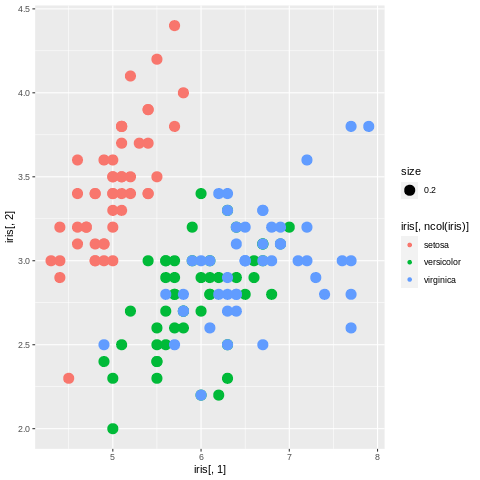

In [ ]:
%%R
library("ggplot2")
with(iris, qplot(iris[,1], iris[,2], colour=iris[,ncol(iris)], cex=0.2))

In [ ]:
%%R
#Use a 80/20 split. 80 for training 20 for testing
library("caret")
index = createDataPartition(iris[,1], p =0.80, list = FALSE)
dim(index)

R[write to console]: Loading required package: lattice



[1] 121   1


In [ ]:
%%R
#80%
training = iris[index,]
dim(training)
#20%
valid = iris[-index,]
dim(valid)

[1] 29  5


In [ ]:
#Cross Validation test Harness. Control test metric (Train the model 10 times create a randomly selected fold)
#This is a classification problem.
%%R
control = trainControl(method="cv", number=10)
metric = "Accuracy"

In [ ]:
#Build a decision Tree Model using rpart
# traing(Output (dot means include all inputs, otherwise use a + ), data, method = actual learning algorithm, metric = accuracy, trControl = validation (10 fold))
%%R
set.seed(7)
fit.rpart = train(Species~., data=training, method="rpart", metric=metric, trControl=control)
fit.rpart

CART 

121 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 109, 108, 109, 109, 109, 109, ... 
Resampling results across tuning parameters:

  cp         Accuracy   Kappa    
  0.0000000  0.9416667  0.9125000
  0.4556962  0.7020979  0.5487037
  0.4936709  0.3738928  0.0450000

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.


In [ ]:
#Look into the entire model 
%%R
summary(fit.rpart$finalModel)

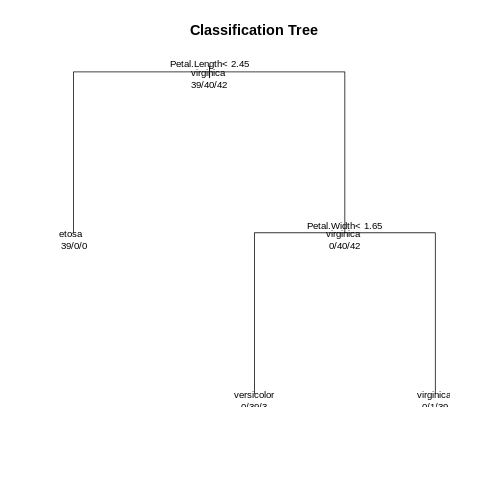

In [ ]:
#Plot the model
%%R
plot(fit.rpart$finalModel, uniform = TRUE, main="Classification Tree")
text(fit.rpart$finalModel, use.n=TRUE, all=TRUE, cex=.8)

In [ ]:
#Fancier Plot
%%R
suppressMessages(install.packages("rattle"))

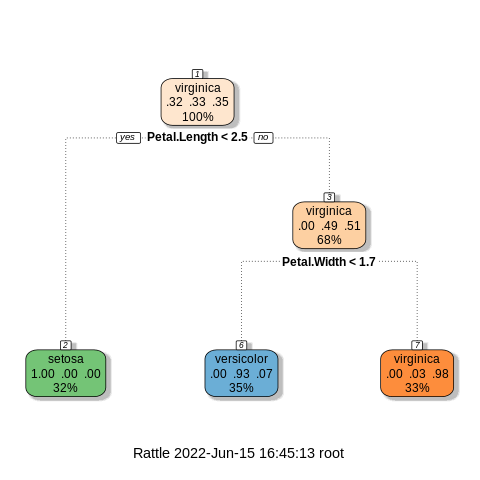

In [ ]:
%%R
suppressMessages(library("rattle"))
fancyRpartPlot(fit.rpart$finalModel)

In [ ]:
#Create Prediction using Trained Decision Tree
%%R
data.pred = predict(fit.rpart, newdata = valid)
table(data.pred, valid$Species)

            
data.pred    setosa versicolor virginica
  setosa         11          0         0
  versicolor      0          9         1
  virginica       0          1         7


In [ ]:
#Check Error Rate
%%R
error.rate = round(mean(data.pred != valid$Species,2))
error.rate

[1] 0


In [ ]:
#Confusion Matrix (similar to Error Rate + Prediction)
%%R
cm = confusionMatrix(as.factor(data.pred), reference = as.factor(valid$Species), mode = "prec_recall")
print(cm)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         11          0         0
  versicolor      0          9         1
  virginica       0          1         7

Overall Statistics
                                          
               Accuracy : 0.931           
                 95% CI : (0.7723, 0.9915)
    No Information Rate : 0.3793          
    P-Value [Acc > NIR] : 7.016e-10       
                                          
                  Kappa : 0.8957          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Precision                   1.0000            0.9000           0.8750
Recall                      1.0000            0.9000           0.8750
F1                          1.0000            0.9000           0.8750
Prevalence                  0.3793            0.3448           0.2759
D

In [ ]:
#Build a decision Tree using rpart Standard Error
%%R
set.seed(7)
fit.rpart1SE = train(Species~., data = training, method ="rpart1SE", metric = metric, trControl = control)
fit.rpart1SE

CART 

121 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 109, 108, 109, 109, 109, 109, ... 
Resampling results:

  Accuracy   Kappa 
  0.9416667  0.9125



In [ ]:
#Can do the same things etc, just change the fit.part1SE

In [ ]:
#Build a decision tree using rpart2
%%R
set.seed(7)
fit.rpart2 = train(Species~., data = training, method ="rpart2", metric = metric, trControl = control)
fit.rpart2

note: only 2 possible values of the max tree depth from the initial fit.
 Truncating the grid to 2 .

CART 

121 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 109, 108, 109, 109, 109, 109, ... 
Resampling results across tuning parameters:

  maxdepth  Accuracy   Kappa    
  1         0.6687646  0.4987037
  2         0.9416667  0.9125000

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was maxdepth = 2.


In [ ]:
#Compare decision Tree Models
%%R
results = resamples(list(rpart=fit.rpart, rpart1SE = fit.rpart1SE, rpart2 = fit.rpart2))
summary(results)


Call:
summary.resamples(object = results)

Models: rpart, rpart1SE, rpart2 
Number of resamples: 10 

Accuracy 
              Min.   1st Qu. Median      Mean 3rd Qu. Max. NA's
rpart    0.8333333 0.8541667      1 0.9416667       1    1    0
rpart1SE 0.8333333 0.8541667      1 0.9416667       1    1    0
rpart2   0.8333333 0.8541667      1 0.9416667       1    1    0

Kappa 
         Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
rpart    0.75 0.78125      1 0.9125       1    1    0
rpart1SE 0.75 0.78125      1 0.9125       1    1    0
rpart2   0.75 0.78125      1 0.9125       1    1    0



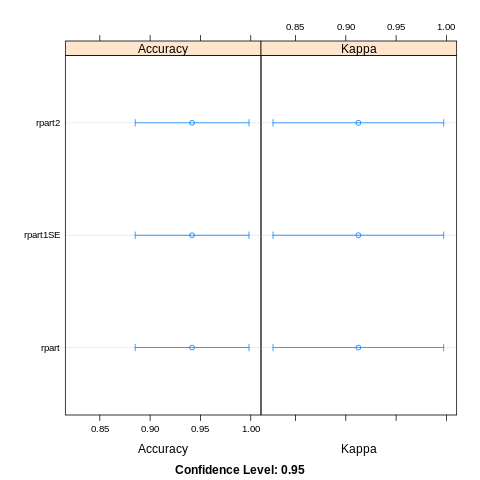

In [ ]:
#Plot the results
%%R
dotplot(results)

#Decision Trees in Python using sklearn

## Libraries

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

In [4]:
#Load the Data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#Convert Y to Dummy Variables (setosa = 0 etc)
y = pd.get_dummies(y)

In [6]:
#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [7]:
#Create the Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
#Prediction
y_pred = dt.predict(X_test)

In [10]:
#Confusion Matrix
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [11]:
#Calculate Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158
